## Cleaning the Statista breach dataset- 2019-2022 (US) and 2016 (UK)

### Important libraries must be installed in the conda envrionment used, libraries installed in this environment
### inlcude the following: 

1. Pandas
2. Matplotlib
4. Numpy
5. Seaborn <br>

**These models can be installed using the pip command or the conda command** </b>

<b>  "pip install seaborn scipy scikit-learn pyreadstat" 
</b>

<b>  **"conda install -c conda-forge seaborn scipy scikit-learn pyreadstat"**</b>



## All data will be combined, then cleaned and analysed.   
## This will  then be combined with other datasets, to make up the final time-series data.


In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore






In [2]:
## Read in the first file and clean..

file_path1 = '/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/RAW_DATA/statistic_id697256_us-government_-number-of-department-cyber-security-incidents-2019-by-attack-vector.csv'
df = pd.read_csv(file_path1)
df.head()


,"U.S. government: number of department cyber security incidents 2019, by attack vector",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Number of reported cyber attacks directed agai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Department of Commerce,Department of Energy,Department of Health and Human Services,Department of Homeland Security,Department of Justice,Department of State,Department of the Treasury,Department of Transportation,Department of Veterans Affairs,National Aeronautics and Space Administration,Social Security Administration,Securities and Exchange Commission
2,Attrition,14,3,14,1,1,10,0,2,0,1,267,1
3,E-mail/phishing,330,111,885,93,378,"1,043",54,15,162,7,90,249
4,External/removable media,0,1,16,10,1,1,1,1,14,0,5,0


## Feature Extraction of first statista dataset

In [3]:
# Dropping the rows that contain metadata and NaN values to clean the dataset

df_clean = df.dropna().copy()

# Converting columns with attack numbers to numeric, handling commas

for col in df_clean.columns[1:]:
    
    df_clean[col] = pd.to_numeric(df_clean[col].str.replace(',', ''), errors='coerce')

# Summing the number of attacks across all departments

df_clean['Total_Attacks_2019'] = df_clean.iloc[:, 1:].sum(axis=1)

# Creating a new DataFrame with the required columns (attack vector and total attacks for 2019)
df_summary = df_clean[['U.S. government: number of department cyber security incidents 2019, by attack vector', 'Total_Attacks_2019']]
df_summary.columns = ['Attack_Vector', 'Total_Attacks']
df_summary['Year'] = 2019  # Adding the year information

# check new data frame

df_summary.head()


/var/folders/y3/5_ydnp0s5ddfxtfqygnzxwx00000gp/T/ipykernel_18345/2075600364.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary['Year'] = 2019  # Adding the year information


,Attack_Vector,Total_Attacks,Year
2,Attrition,314,2019
3,E-mail/phishing,3417,2019
4,External/removable media,50,2019
5,Impersonation,49,2019
6,Improper usage,8320,2019


## Data   Visualization using a horizontal bar chart.

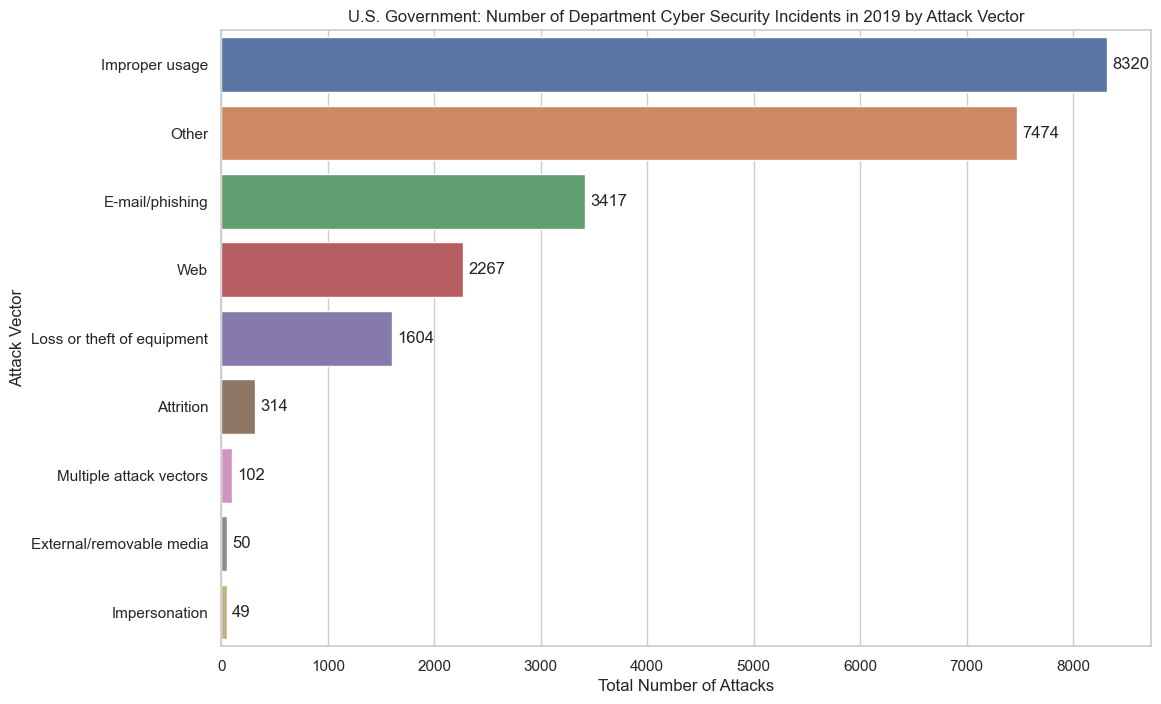

In [4]:
# Importing the necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the visual style for the plot
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(12, 8))
plot = sns.barplot(x="Total_Attacks", y="Attack_Vector", data=df_summary.sort_values("Total_Attacks", ascending=False))
plt.title("U.S. Government: Number of Department Cyber Security Incidents in 2019 by Attack Vector")
plt.xlabel("Total Number of Attacks")
plt.ylabel("Attack Vector")

# Annotating the bars with the exact number of attacks
for p in plot.patches:
    width = p.get_width()
    plt.text(width + 50, p.get_y() + p.get_height() / 2, int(width), ha="left", va="center")

plt.show()


In [5]:
# Drop Attack_vector. column

df_summary=df_summary.drop(['Attack_Vector'],axis = True)

df_summary.head()

,Total_Attacks,Year
2,314,2019
3,3417,2019
4,50,2019
5,49,2019
6,8320,2019


In [6]:
# Convert the "Year" column to a datetime object with only the year portion

df_summary['Year'] = pd.to_datetime(df_summary['Year'], format='%Y')

# Optionally, set the "Year" column as the index

df_summary.set_index('Year', inplace=True)

df_summary['Country'] = 'US'

# Display the DataFrame to verify the changes

df_summary.head()


,Total_Attacks,Country
Year,,
2019-01-01,314,US
2019-01-01,3417,US
2019-01-01,50,US
2019-01-01,49,US
2019-01-01,8320,US


In [7]:
# Summarizing the total number of attacks that occurred in 2019

total_attacks_2019 = df_summary['Total_Attacks'].sum()
total_attacks_2019


# Creating a DataFrame to store the total number of attacks for the year 2019

total_attacks_df = pd.DataFrame({'Year': [2019], 'no_of_attacks': [total_attacks_2019]})

# Displaying the DataFrame

total_attacks_df


,Year,no_of_attacks
0,2019,23597


In [8]:
# saving files, so I can load and combine (uncomment to save on own local machine or database)
#total_attacks_df.to_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/total_attacks_df.csv', index=True)

In [9]:
# Loading second statista file and doing same...

# Loading the second file to take a quick look at its structure
file_path2 = '/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/RAW_DATA/statistic_id697279_us-government_-number-of-cyber-security-incidents-2020-by-attack-vector.csv'
df1 = pd.read_csv(file_path2)

df1.head()



,"U.S. government: number of cyber security incidents 2020, by attack vector",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,CFO,Non-CFO,Government-wide
2,Attrition,342,3,345
3,E-mail/phishing,"4,225",39,"4,264"
4,External/removable media,29,3,32


In [10]:

# Identifying the correct column name for the "Government-wide" data

government_wide_column = df1.columns[-1]

# Converting the column with attack numbers to numeric, handling commas

df1_clean = df1.dropna().copy()

df1_clean[government_wide_column] = pd.to_numeric(df1_clean[government_wide_column].str.replace(',', ''), errors='coerce')

# Creating a new DataFrame with the required columns (attack vector and total attacks for 2020)

df1_summary = df1_clean[['U.S. government: number of cyber security incidents 2020, by attack vector', government_wide_column]]
df1_summary.columns = ['Attack_Vector', 'Total_Attacks']
df1_summary['Year'] = 2020  # Adding the year information

df1_summary.head()


/var/folders/y3/5_ydnp0s5ddfxtfqygnzxwx00000gp/T/ipykernel_18345/1160652289.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_summary['Year'] = 2020  # Adding the year information


,Attack_Vector,Total_Attacks,Year
2,Attrition,345,2020
3,E-mail/phishing,4264,2020
4,External/removable media,32,2020
5,Impersonation/spoofing,93,2020
6,Improper usage,11874,2020


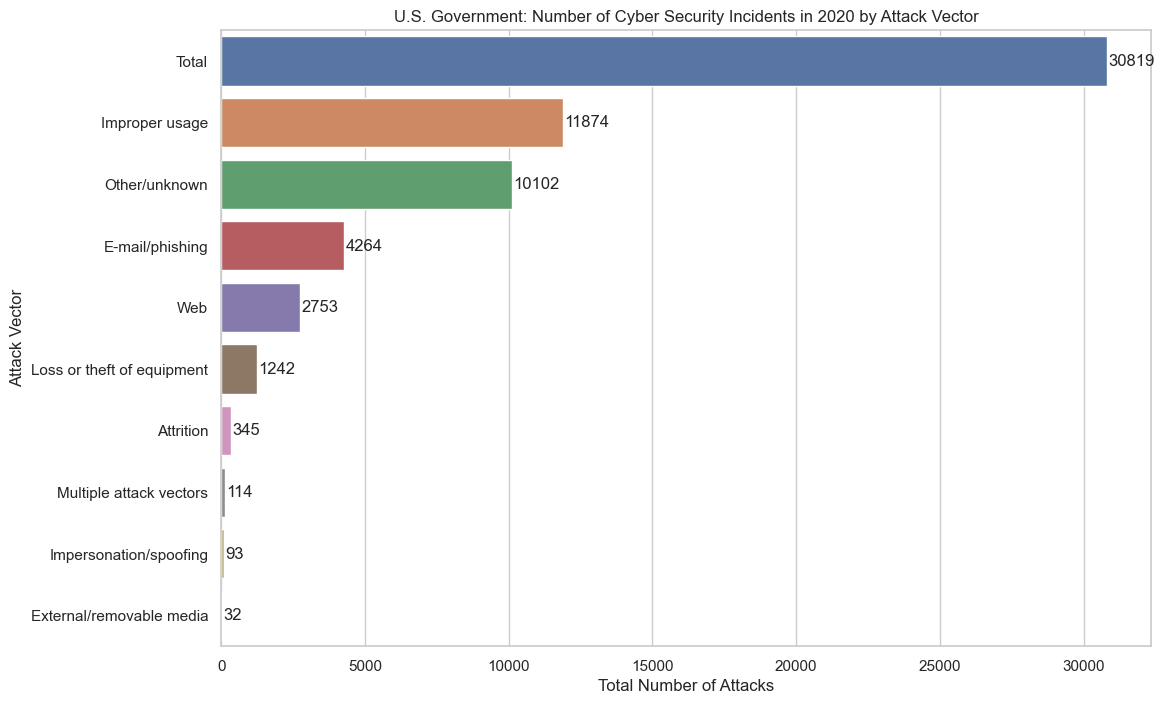

In [11]:
# Creating the bar plot for the 2020 data
plt.figure(figsize=(12, 8))
plot_2020 = sns.barplot(x="Total_Attacks", y="Attack_Vector", data=df1_summary.sort_values("Total_Attacks", ascending=False))
plt.title("U.S. Government: Number of Cyber Security Incidents in 2020 by Attack Vector")
plt.xlabel("Total Number of Attacks")
plt.ylabel("Attack Vector")

# Annotating the bars with the exact number of attacks
for p in plot_2020.patches:
    width = p.get_width()
    plt.text(width + 50, p.get_y() + p.get_height() / 2, int(width), ha="left", va="center")

plt.show()


<font size = '3.0'>
Similar to the 2019 data, the attack vector "Improper usage" has the highest number of incidents, followed by <br>  "E-mail/phishing."
</font>

In [12]:
df1_summary=df1_summary.drop(['Attack_Vector'],axis = True)

df1_summary.head()




,Total_Attacks,Year
2,345,2020
3,4264,2020
4,32,2020
5,93,2020
6,11874,2020


In [13]:
# Summarizing the total number of attacks that occurred in 2020

total_attacks_2020 = df1_summary['Total_Attacks'].sum()

# Creating a DataFrame to store the total number of attacks for the year 2020
total_attacks_2020_df = pd.DataFrame({'Year': [2020], 'no_of_attacks': [total_attacks_2020]})

# Displaying the DataFrame

total_attacks_2020_df



,Year,no_of_attacks
0,2020,61638


In [14]:
# saving files, so I can load and combine
total_attacks_2020_df.to_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/total_attacks_2020_df.csv', index=True)

In [15]:
# Loading the third statista file and doing same..

# Loading the fourth file to take a quick look at its structure
file_path3 = '/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/RAW_DATA/statistic_id1367217_us-number-of-cyber-attacks-leading-to-data-violation-2020-2022-by-type.csv'
df2 = pd.read_csv(file_path3)
df2.head()


,"U.S. number of cyber attacks leading to data violation 2020-2022, by type",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,2022,2021,2020.0
2,Phishing/Smishing/BEC,461,537,383.0
3,Ransomware,276,357,158.0
4,Malware,70,141,104.0


In [16]:
# Setting the correct column headers using the second row

df2.columns = df2.iloc[1].fillna('Type')
df2 = df2.drop([0, 1]).reset_index(drop=True)

# Converting the columns for years to numeric

for col in df2.columns[1:]:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# Dropping rows with NaN values
df2_clean = df2.dropna().reset_index(drop=True)

df2_clean.head()



1,Type,2022,2021,2020.0
0,Phishing/Smishing/BEC,461.0,537.0,383.0
1,Ransomware,276.0,357.0,158.0
2,Malware,70.0,141.0,104.0
3,Non-Secured Cloud Environment,9.0,24.0,50.0
4,Credential Stuffing,18.0,14.0,17.0


/var/folders/y3/5_ydnp0s5ddfxtfqygnzxwx00000gp/T/ipykernel_18345/2790048454.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Year", y="No_of_Attacks", hue="Type", data=df2_melted, ci=None)


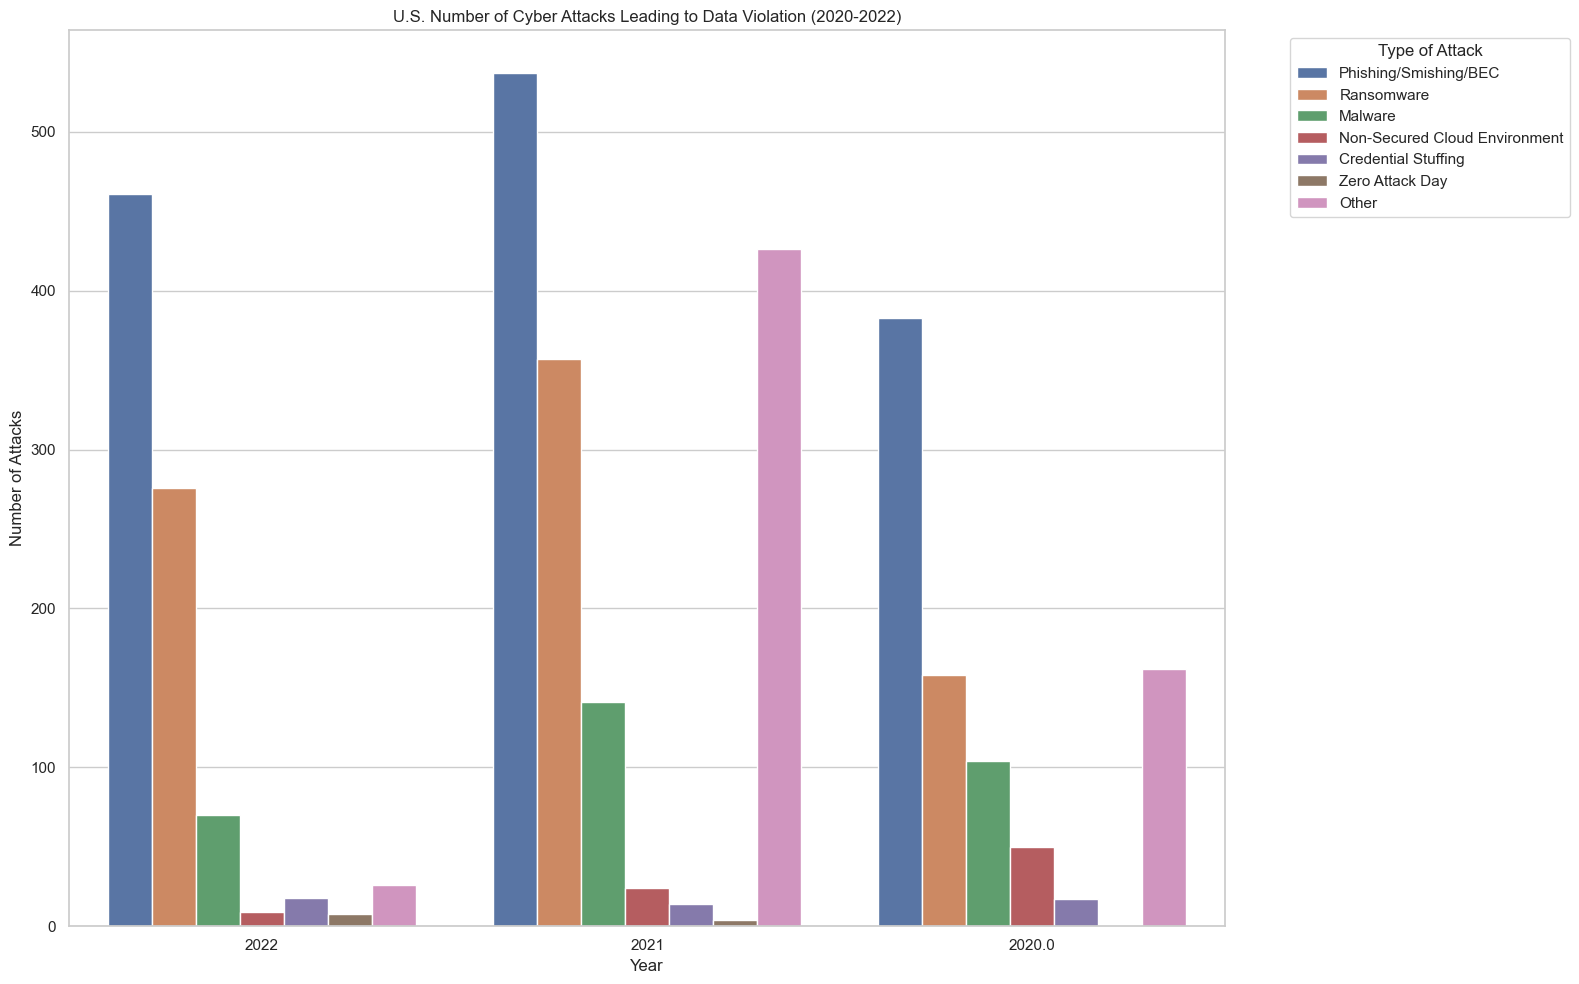

In [17]:
# Melting the DataFrame to make it suitable for plotting
df2_melted = df2_clean.melt(id_vars=["Type"], var_name="Year", value_name="No_of_Attacks")

# Creating the bar plot
plt.figure(figsize=(16, 10))
sns.barplot(x="Year", y="No_of_Attacks", hue="Type", data=df2_melted, ci=None)
plt.title("U.S. Number of Cyber Attacks Leading to Data Violation (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.legend(title='Type of Attack', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<font size = '3.0'> 
Bar plot representing the number of cyber attacks leading to data violations in the U.S. for the years 2020, 2021, and 2022, categorized by type.
</font>

<font size = '3.0'>
Extracting some attack types, to make uniform with previous dataset.
</font>

In [18]:
# Filtering the data to include only the specified types of attacks
specified_types = ['Phishing/Smishing/BEC', 'Malware', 'Ransomware', 'Credential Stuffing', 'Zero-Day Attack']
df2_filtered = df2_clean[df2_clean['Type'].isin(specified_types)].reset_index(drop=True)

# Displaying the filtered DataFrame
df2_filtered


1,Type,2022,2021,2020.0
0,Phishing/Smishing/BEC,461.0,537.0,383.0
1,Ransomware,276.0,357.0,158.0
2,Malware,70.0,141.0,104.0
3,Credential Stuffing,18.0,14.0,17.0


In [19]:
# Summing the number of attacks for each year
total_attacks_filtered = df2_filtered.iloc[:, 1:].sum(axis=0).reset_index()

total_attacks_filtered.columns = ['Year', 'no_of_attacks']

# Displaying the DataFrame
total_attacks_filtered


,Year,no_of_attacks
0,2022,825.0
1,2021,1049.0
2,2020.0,662.0


In [20]:
# saving files, so I can load and combine
total_attacks_filtered.to_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/total_attacks_filtered.csv', index=True)

In [21]:
# Transposing the DataFrame to make the "Year" column an index

df2_summary = df2_clean.set_index('Type').transpose().reset_index()

# Renaming the columns and setting the name to None to remove the extra level
df2_summary.columns.name = None
df2_summary.rename(columns={df2_summary.columns[0]: 'Year'}, inplace=True)

# Converting the 'Year' column to numeric

df2_summary['Year'] = pd.to_numeric(df2_summary['Year'], errors='coerce')

# Summing the number of attacks across types for each year
df2_summary['Total_Attacks'] = df2_summary.iloc[:, 1:].sum(axis=1)

# Keeping only the 'Year' and 'Total_Attacks' columns
df2_summary = df2_summary[['Year', 'Total_Attacks']]

# Setting the 'Year' column as the index

# Convert the "Year" column to a datetime object with only the year portion

df2_summary['Year'] = pd.to_datetime(df2_summary['Year'], format='%Y')

# set the "Year" column as the index

df2_summary.set_index('Year', inplace=True)

df2_summary['Country'] = 'US'

df2_summary.head()


,Total_Attacks,Country
Year,,
2022-01-01,868.0,US
2021-01-01,1503.0,US
2020-01-01,875.0,US


In [22]:
# Loading the third newly uploaded file
file_path4 = '/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/RAW_DATA/statistic_id322560_online-crime-incidents-experienced-in-england-and-wales-2016-by-industry-and-type.csv'
df3= pd.read_csv(file_path4)

# Displaying the first few rows to inspect the data
df3.head()


,"Online crime incidents experienced in England and Wales 2016, by industry and type",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Number of online crime incidents experienced b...,NaN,NaN,NaN
1,NaN,Wholesale and retail,Transportation and storage,Administration and support
2,Hacking,"3,778",865,"1,924"
3,Phishing,0,60,"2,601"
4,Theft of money (online),"2,779",548,"1,582"


In [23]:

# Setting the correct column headers manually based on observation
df3.columns = ['Attack_Type', 'Wholesale_and_Retail', 'Transportation_and_Storage', 'Administration_and_Support']

# Converting the columns for industries to numeric
for col in df3.columns[1:]:
    df3[col] = pd.to_numeric(df3[col].str.replace(',', ''), errors='coerce')

# Adding a 'Year' column with the value 2016
df3['Year'] = 2016

# Summing the number of attacks across all industries for each attack type
df3['Total_Attacks'] = df3.iloc[:, 1:4].sum(axis=1)

# Creating a new DataFrame containing only the 'Attack_Type' and 'Total_Attacks' columns
df3_attack_types = df3[['Attack_Type', 'Total_Attacks']].dropna().reset_index(drop=True)

# Displaying the DataFrame containing the individual attack types and their sums
df3_attack_types


,Attack_Type,Total_Attacks
0,Number of online crime incidents experienced b...,0.0
1,Hacking,6567.0
2,Phishing,2661.0
3,Theft of money (online),4909.0
4,Theft of information (online),1310.0
5,Website vandalism,4225.0
6,Computer virus,26833.0
7,Other online crime,331308.0


### Plotting the cleaned statista uk dataset.

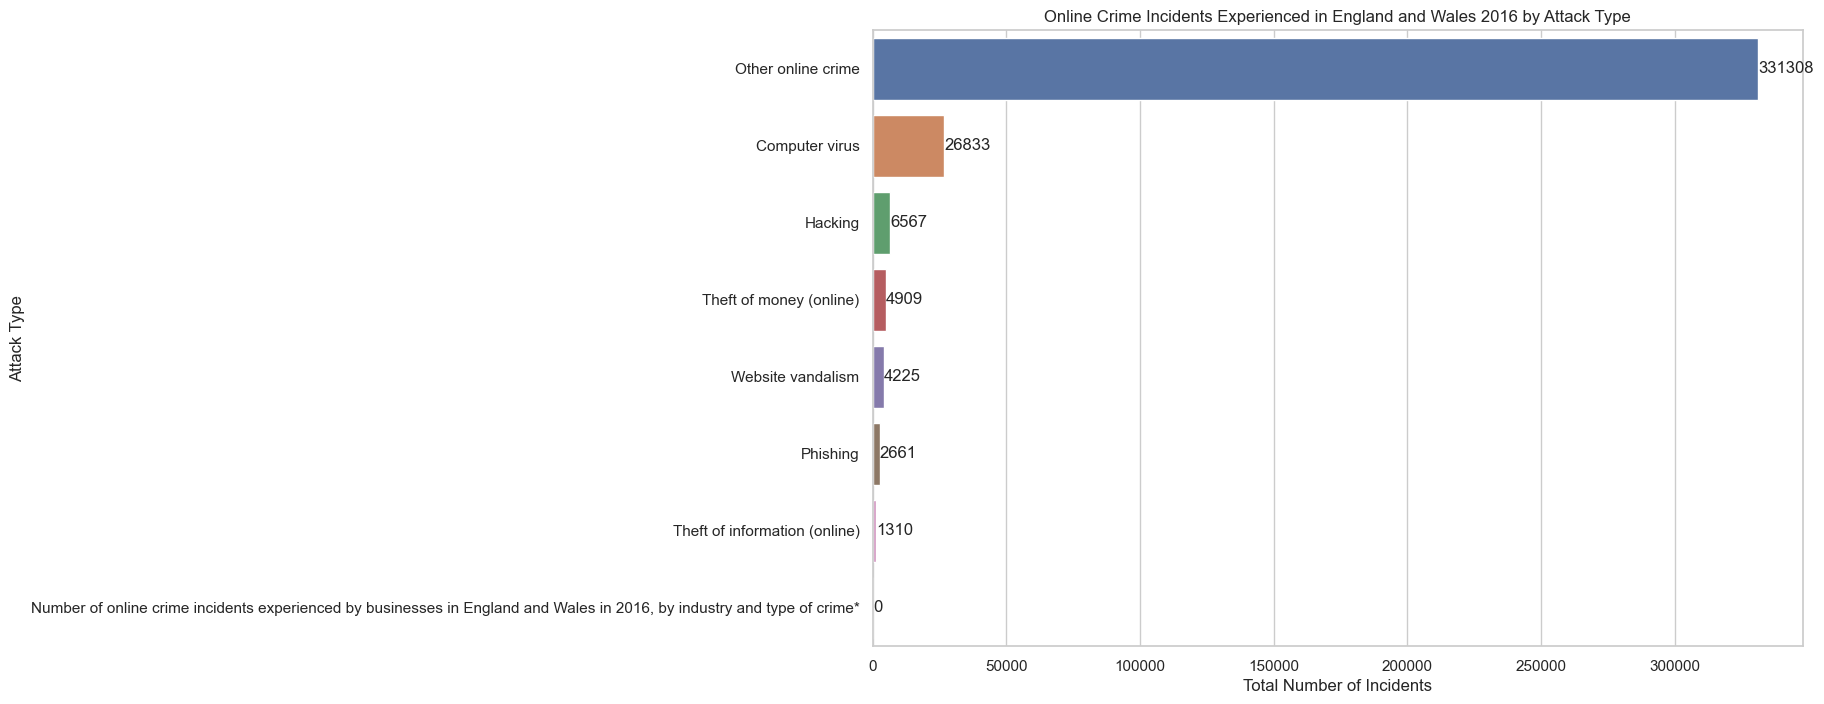

In [24]:
# Creating the bar plot for the 2016 data
plt.figure(figsize=(12, 8))
plot_2016 = sns.barplot(x="Total_Attacks", y="Attack_Type", data=df3_attack_types.sort_values("Total_Attacks", ascending=False))
plt.title("Online Crime Incidents Experienced in England and Wales 2016 by Attack Type")
plt.xlabel("Total Number of Incidents")
plt.ylabel("Attack Type")

# Annotating the bars with the exact number of incidents
for p in plot_2016.patches:
    width = p.get_width()
    plt.text(width + 50, p.get_y() + p.get_height() / 2, int(width), ha="left", va="center")

plt.show()


<font size = '3.0'>
Extracting some attack types, to make uniform with previous dataset.
</font>

In [25]:
# Filtering the data to include only the specified types of attacks

specified_types_2016 = ['Computer virus', 'Phishing', 'Theft of money (online)', 'Theft of information (online)']
df3_filtered = df3_attack_types[df3_attack_types['Attack_Type'].isin(specified_types_2016)].reset_index(drop=True)

# Displaying the filtered DataFrame
df3_filtered


,Attack_Type,Total_Attacks
0,Phishing,2661.0
1,Theft of money (online),4909.0
2,Theft of information (online),1310.0
3,Computer virus,26833.0


In [26]:
# Summing 'Theft of money (online)' and 'Theft of information (online)' into a new row 'Theft'
theft_sum = df3_filtered[df3_filtered['Attack_Type'].isin(['Theft of money (online)', 'Theft of information (online)'])]['Total_Attacks'].sum()

# Adding the new row to the DataFrame
new_row = pd.DataFrame({'Attack_Type': ['Theft'], 'Total_Attacks': [theft_sum]})

# Removing the original 'Theft of money (online)' and 'Theft of information (online)' rows
df3_filtered = df3_filtered[~df3_filtered['Attack_Type'].isin(['Theft of money (online)', 'Theft of information (online)'])]

# Appending the new 'Theft' row
df3_filtered = pd.concat([df3_filtered, new_row], ignore_index=True)

# Displaying the updated DataFrame
df3_filtered


,Attack_Type,Total_Attacks
0,Phishing,2661.0
1,Computer virus,26833.0
2,Theft,6219.0


In [27]:
# Summing the number of attacks across all specified crime types for 2016
total_attacks_2016 = df3_filtered['Total_Attacks'].sum()

# Creating a DataFrame with the annual total for 2016
df3_summary = pd.DataFrame({'Year': [2016], 'no_of_attacks': [total_attacks_2016]})

# Displaying the final summary DataFrame
df3_summary


,Year,no_of_attacks
0,2016,35713.0


In [28]:
# saving files, so I can load and combine
df3_summary.to_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/df3_summary.csv', index=True)

## Combine dataframes.

In [29]:
# Loading the uploaded CSV files into DataFrames
total_attacks_filtered_df = pd.read_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/total_attacks_filtered.csv')
total_attacks_df = pd.read_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/total_attacks_df.csv')
total_attacks_2020_df = pd.read_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/total_attacks_2020_df.csv')
df3_summary_uploaded = pd.read_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/df3_summary.csv')

# Combining all DataFrames into a single DataFrame named 'statista_df'
statista_df = pd.concat([total_attacks_filtered_df, total_attacks_df, total_attacks_2020_df, df3_summary_uploaded], ignore_index=True)

# Sorting the DataFrame by 'Year'
statista_df = statista_df.sort_values(by='Year').reset_index(drop=True)

# Displaying the combined and sorted DataFrame
statista_df.head()


,Unnamed: 0,Year,no_of_attacks
0,0,2016.0,35713.0
1,0,2019.0,23597.0
2,2,2020.0,662.0
3,0,2020.0,61638.0
4,1,2021.0,1049.0


In [30]:
# Adding a 'Country' column to each DataFrame before combining
total_attacks_filtered_df['Country'] = 'US'
total_attacks_df['Country'] = 'US'
total_attacks_2020_df['Country'] = 'US'
df3_summary['Country'] = 'UK'

# Combining all DataFrames into a single DataFrame named 'statista_df'
statista_df = pd.concat([total_attacks_filtered_df, total_attacks_df, total_attacks_2020_df, df3_summary], ignore_index=True)

# Sorting the DataFrame by 'Year'
statista_df = statista_df.sort_values(by='Year').reset_index(drop=True)

# Dropping the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in statista_df.columns:
    statista_df.drop('Unnamed: 0', axis=1, inplace=True)

# Displaying the combined and sorted DataFrame
statista_df


,Year,no_of_attacks,Country
0,2016.0,35713.0,UK
1,2019.0,23597.0,US
2,2020.0,662.0,US
3,2020.0,61638.0,US
4,2021.0,1049.0,US
5,2022.0,825.0,US


In [31]:
# Restructuring data to show US and UK 

df3_summary = pd.DataFrame({'Year': [2016], 'No_of_Attacks': [35713], 'Country': ['UK']})

# Combining all DataFrames into a single DataFrame named 'statista_df'
statista_df = pd.concat([total_attacks_filtered_df, total_attacks_df, total_attacks_2020_df, df3_summary], ignore_index=True)

# Sorting the DataFrame by 'Year'
statista_df = statista_df.sort_values(by='Year').reset_index(drop=True)

# Dropping the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in statista_df.columns:
    statista_df.drop('Unnamed: 0', axis=1, inplace=True)

# Displaying the combined and sorted DataFrame
statista_df.head()


,Year,no_of_attacks,Country,No_of_Attacks
0,2016.0,NaN,UK,35713.0
1,2019.0,23597.0,US,NaN
2,2020.0,662.0,US,NaN
3,2020.0,61638.0,US,NaN
4,2021.0,1049.0,US,NaN


In [32]:
# Further cleaning of data to drop all NaN

# Re-combining the DataFrames to start from the previous step

statista_df = pd.concat([total_attacks_filtered_df, total_attacks_df, total_attacks_2020_df, df3_summary], ignore_index=True)

# Converting the 'Year' column to integers
statista_df['Year'] = statista_df['Year'].astype(int)

# Consolidating the 'no_of_attacks' and 'No_of_Attacks' columns into a single column
# Using 'fillna(0)' to replace NaN values with zero before summing
statista_df['Total_Attacks'] = statista_df['no_of_attacks'].fillna(0) + statista_df['No_of_Attacks'].fillna(0)

# Dropping the original 'no_of_attacks' and 'No_of_Attacks' columns

statista_df.drop(['no_of_attacks', 'No_of_Attacks'], axis=1, inplace=True)

# Dropping the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in statista_df.columns:
    statista_df.drop('Unnamed: 0', axis=1, inplace=True)

# Sorting the DataFrame by 'Year'
statista_df = statista_df.sort_values(by='Year').reset_index(drop=True)

# Displaying the cleaned and consolidated DataFrame
statista_df


,Year,Country,Total_Attacks
0,2016,UK,35713.0
1,2019,US,23597.0
2,2020,US,662.0
3,2020,US,61638.0
4,2021,US,1049.0
5,2022,US,825.0


In [33]:
# Renaming the 'Total_Attacks' column to 'no_of_attacks'

statista_df.rename(columns={'Total_Attacks': 'no_of_attacks'}, inplace=True)

# Reordering the columns to move 'Country' to index position 2

column_order = ['Year', 'no_of_attacks', 'Country']
statista_df = statista_df[column_order]

# Displaying the DataFrame with the updated column order
statista_df.head()


,Year,no_of_attacks,Country
0,2016,35713.0,UK
1,2019,23597.0,US
2,2020,662.0,US
3,2020,61638.0,US
4,2021,1049.0,US


In [34]:
# Save statista_df data, as I will be resampling the data to monthly frequencies in the next step

#statista_df.to_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/statista_df.csv', index=False)

In [35]:
# Convert the 'Year' column to datetime format
statista_df['Year'] = pd.to_datetime(statista_df['Year'], format='%Y')



## Resample(upsample) the statista dataset to be uniform with the rest of the time series data.


In [36]:
# Aggregate the data by taking the average of duplicate 'Year' entries
statista_df = statista_df.groupby('Year').mean()

# Upsample the data to a monthly frequency and forward fill the missing values
statista_df_resampled = statista_df.resample('M').ffill()

# Display the first few rows of the resampled dataset
statista_df_resampled.head(15)


/var/folders/y3/5_ydnp0s5ddfxtfqygnzxwx00000gp/T/ipykernel_18345/1001654720.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  statista_df = statista_df.groupby('Year').mean()


,no_of_attacks
Year,
2016-01-31,35713.0
2016-02-29,35713.0
2016-03-31,35713.0
2016-04-30,35713.0
2016-05-31,35713.0
2016-06-30,35713.0
2016-07-31,35713.0
2016-08-31,35713.0
2016-09-30,35713.0



### Plotting the resampled data.

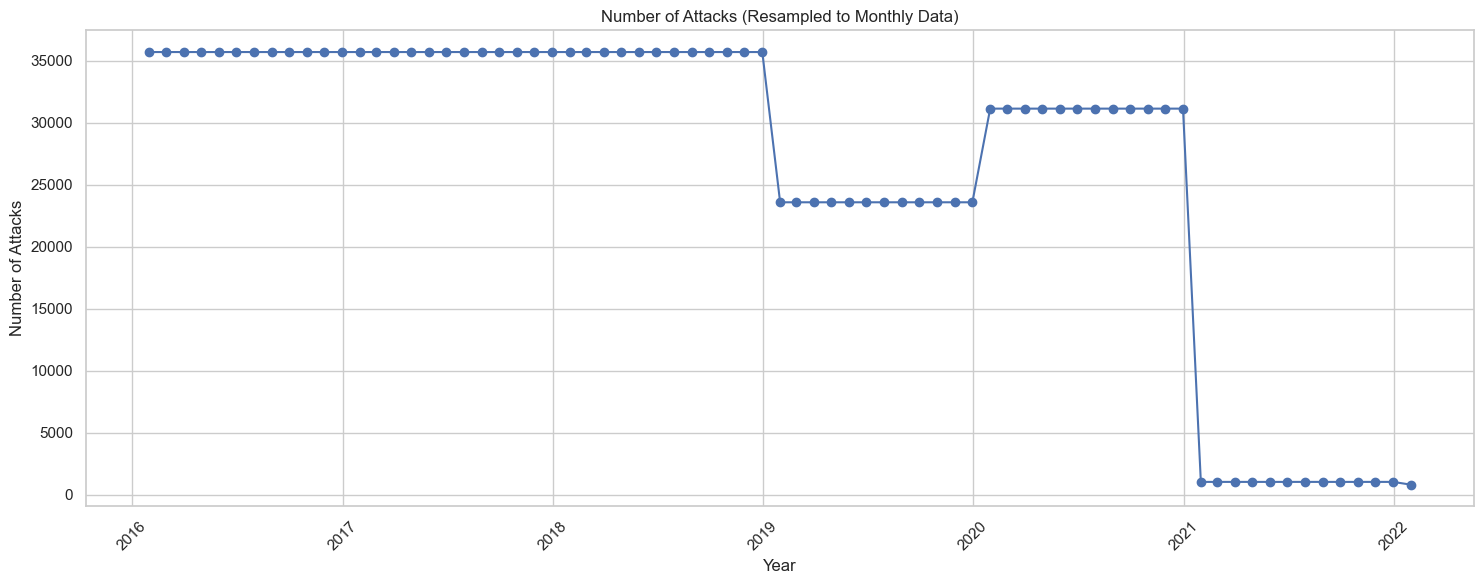

In [37]:
# Create a plot for the resampled data
plt.figure(figsize=(15, 6))
plt.plot(statista_df_resampled.index, statista_df_resampled['no_of_attacks'], marker='o', linestyle='-')
plt.title('Number of Attacks (Resampled to Monthly Data)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Checking for outliers

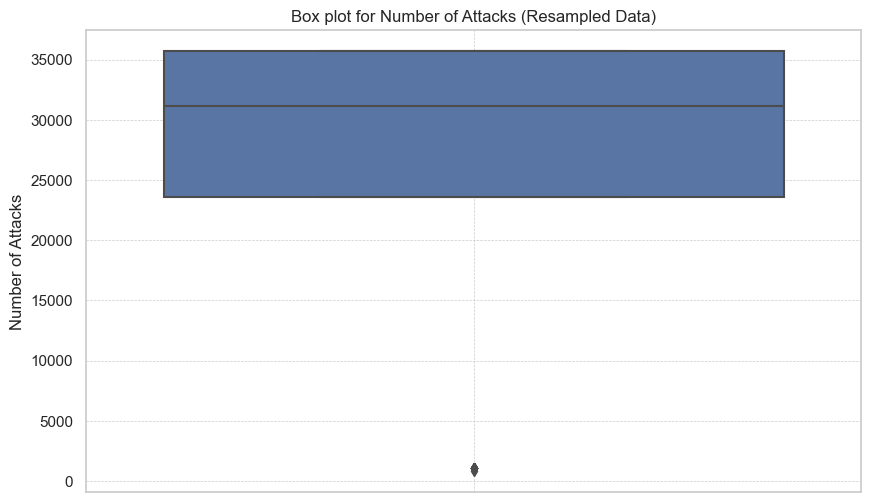

In [38]:
# Create a box plot for the 'no_of_attacks' column to identify potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=statista_df_resampled['no_of_attacks'])
plt.title('Box plot for Number of Attacks (Resampled Data)')
plt.ylabel('Number of Attacks')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


**Some low datapoints identified,will further check for outliers using z scores.**

In [39]:
# Calculate z-scores for 'no_of_attacks' column in the resampled dataset
z_scores_statista = zscore(statista_df_resampled['no_of_attacks'])

# Define a threshold for outliers (e.g., |Z| > 3)
threshold = 3
outliers_statista = statista_df_resampled[np.abs(z_scores_statista) > threshold]

outliers_statista


,no_of_attacks
Year,


<font size = '4.0'>
 After running the z score, no outlier was detected.
 <font>

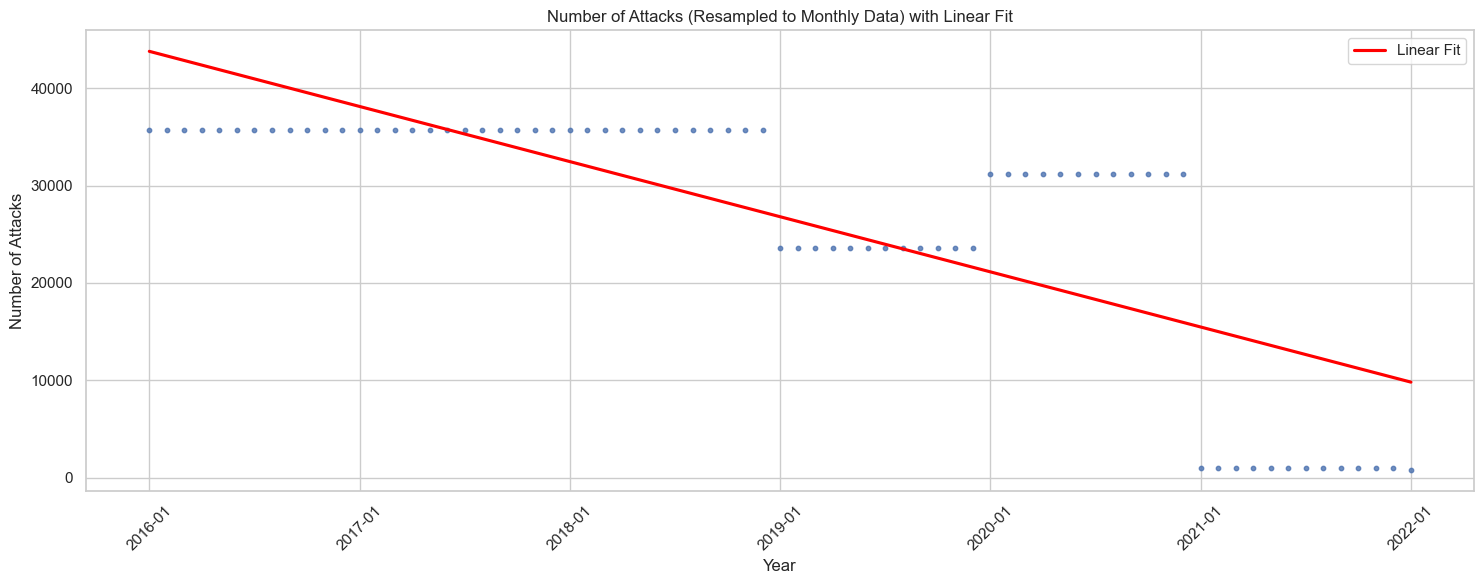

(-471.581821547575, 43772.08256201407)

In [40]:
import seaborn as sns
from scipy.stats import linregress

# Convert index to integer for regression
x_values_statista = np.array(range(len(statista_df_resampled)))

# Create the plot using seaborn and matplotlib for linear regression
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data points and linear fit using seaborn's regplot
sns.regplot(x=x_values_statista, y='no_of_attacks', data=statista_df_resampled, 
            line_kws={"color": "red", "label": "Linear Fit"}, ci=None, ax=ax, scatter_kws={'s': 10})

# Title and labels
ax.set_title('Number of Attacks (Resampled to Monthly Data) with Linear Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Attacks')

# Rotate x-axis labels for better visibility and set them to spaced-out unique values in the index
unique_dates_statista = statista_df_resampled.index.strftime('%Y-%m').unique()
spaced_dates_statista = unique_dates_statista[::12]  # Select every 12th date for a less cluttered x-axis

ax.set_xticks(range(0, len(statista_df_resampled), 12))
ax.set_xticklabels(spaced_dates_statista, rotation=45)

# Add grid and legend
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

# Calculate the slope and intercept using scipy's linregress function for the resampled data
slope_statista, intercept_statista, _, _, _ = linregress(x_values_statista, statista_df_resampled['no_of_attacks'])
slope_statista, intercept_statista


<font size = '3.5'>
The linear regression equation for the number of attacks over time is given by:  y=−471.58x+43772.08
Where:y is the estimated number of attacks.
x is the time index (0 for the first month, 1 for the second month, and so on).
This means that, on average, the number of attacks is decreasing by approximately 471.58 units per month from an initial value of 43,772.08.
</font>

In [41]:

# Save the statista_df_resampled dataset to a CSV file
#save_path = '/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/statista_df_resampled.csv'

#statista_df_resampled.to_csv(save_path)

#save_path


'/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/statista_df_resampled.csv'

## Data was sourced from Statista:
**Reference: https://www.statista.com/statistics/221293/cyber-crime-target-industries/**

## This script is part of the author's research project, initial stage: Data Cleaning.


    
### This script can be reproduced without permission.
    


### Author : Chinyere.O.Ugorji &copy; 2023

In [42]:
import sys
print(sys.version)


3.10.12 (main, Jul  5 2023, 14:49:34) [Clang 14.0.6 ]
